# Compétition Kaggle : Projet Titanic 

# Partie 1 : Collecte des données

In [1]:
#On importe les librairies que l'on va utiliser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection

In [2]:
#On importe le fichier csv
import os
os.getcwd()
os.chdir("/kaggle/input/titanic")

In [3]:
#Chargement du fichier CSV
gender_sub = pd.read_csv("gender_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# *Data Dictionary*
* Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Variable Notes
**pclass:** A proxy for socio-economic status (SES)
1. * 1st = Upper
1. * 2nd = Middle
1. * 3rd = Lower
**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
1. * Sibling = brother, sister, stepbrother, stepsister
1. * Spouse = husband, wife (mistresses and fiancés were ignored)
**parch:** The dataset defines family relations in this way...
1. * Parent = mother, father
1. * Child = daughter, son, stepdaughter, stepson
1. * Some children travelled only with a nanny, therefore parch=0 for them.

# Apercus des CSV

In [4]:
gender_sub.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Il semble que le CSV train soit plus complet

In [7]:
#describe pour avoir un apercus 
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

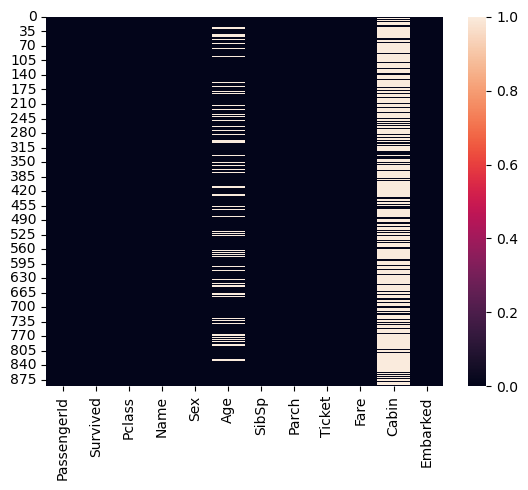

In [8]:
#voir les erreurs et valeurs manquantes
print(train.isna().sum())
sns.heatmap(train.isna())

In [9]:
# Calculer le taux de remplissage. Pas beaucoup d'info sur les cabines, seulement une partie sur l'age
fill_rate = train.notnull().mean()

print(fill_rate)

PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
dtype: float64


# Partie 2 : Feature engineering

In [10]:
# Sélectionner les features principales pour l'analyse
features = train[["PassengerId","Name", "Sex", "Age", \
                  "Fare" ,"Embarked", "Pclass", "Survived"]]

# Imprimer un apercu tableau
features.head()


PassengerId                                               Name     Sex  \
0            1                            Braund, Mr. Owen Harris    male   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2            3                             Heikkinen, Miss. Laina  female   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4            5                           Allen, Mr. William Henry    male   

    Age     Fare Embarked  Pclass  Survived  
0  22.0   7.2500        S       3         0  
1  38.0  71.2833        C       1         1  
2  26.0   7.9250        S       3         1  
3  35.0  53.1000        S       1         1  
4  35.0   8.0500        S       3         0

# Connaitre le nombres de survivants et de décés

In [11]:
#Connaitre le nombres de survivants et de décés
survived_counts = train["Survived"].value_counts()
print(survived_counts)

0    549
1    342
Name: Survived, dtype: int64


Il y a donc **549 décés** et **342 survivants**
Le taux de décés est donc de **61.62%** , le taux de survie de **38.38%**

**Countplot de décés vs survies**

<AxesSubplot:xlabel='Survived', ylabel='count'>

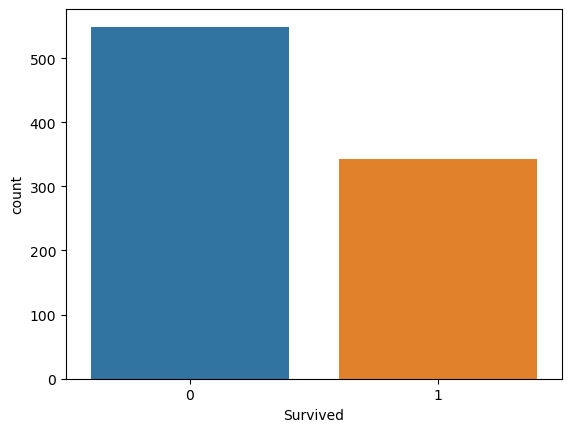

In [12]:
#Countplot de décés vs survies
sns.countplot(x='Survived',data=train)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

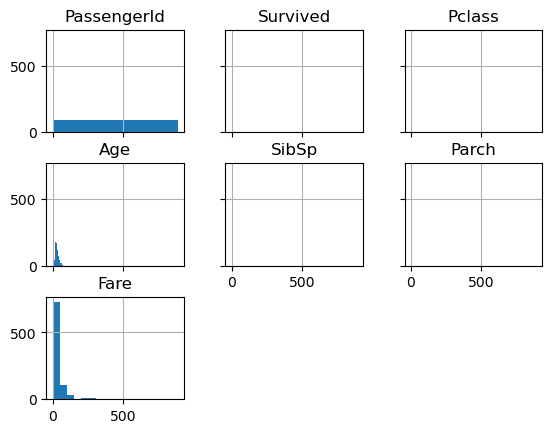

In [13]:
#Histogramme avant nettoyage
train.hist( sharex= True , sharey=True)

# Remplacer les valeurs manquantes

Méthode KNN

In [14]:
#KNN
from sklearn.impute import KNNImputer

# Charger les données d'entraînement
train = pd.read_csv("train.csv")

# Sélectionner les colonnes pertinentes pour l'imputation des âges manquants
age_cols = ["Age", "Pclass", "SibSp", "Parch", "Fare"]

# Créer un imputeur K-NN avec 5 voisins
imputer = KNNImputer(n_neighbors=5)

# Imputer les âges manquants
train[age_cols] = imputer.fit_transform(train[age_cols])

# Afficher les premières lignes des données d'entraînement imputées
print(train.head())


   PassengerId  Survived  Pclass  \
0            1         0     3.0   
1            2         1     1.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S  


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

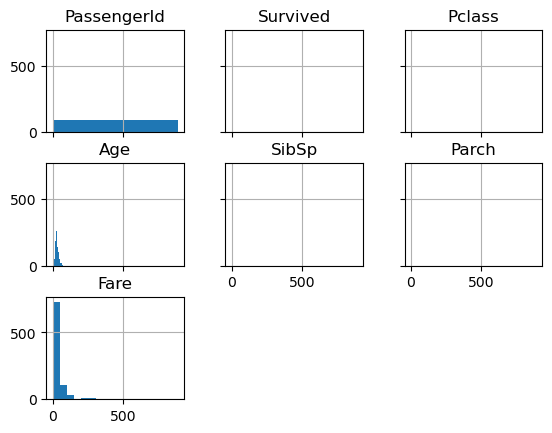

In [15]:
#Histogramme aprés nettoyage
train.hist( sharex= True , sharey=True)

# Calcul du taux de survie par **Sex, Age, Tarif, Port d'embarquement et par classe**

# Taux de Survie

In [16]:
# regrouper les données par sexe et calculer les taux de survie
sex_group = train.groupby(["Sex"])["Survived"].mean()

# regrouper les données par âge et calculer les taux de survie
age_group = pd.cut(train["Age"], [0, 18, 25, 40, 60, 100])
age_group = train.groupby([age_group])["Survived"].mean()

# regrouper les données par tarif et calculer les taux de survie
fare_group = pd.cut(train["Fare"], [0, 10, 25, 50, 100, 1000])
fare_group = train.groupby([fare_group])["Survived"].mean()

# regrouper les données par port d'embarquement et calculer les taux de survie
embarked_group = train.groupby(["Embarked"])["Survived"].mean()

# regrouper les données par classe et calculer les taux de survie
class_group = train.groupby(["Pclass"])["Survived"].mean()

print("Taux de survie par sexe :\n", sex_group)
print("\nTaux de survie par âge :\n", age_group)
print("\nTaux de survie par tarif :\n", fare_group)
print("\nTaux de survie par port d'embarquement :\n", embarked_group)
print("\nTaux de survie par classe :\n", class_group)


Taux de survie par sexe :
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Taux de survie par âge :
 Age
(0, 18]      0.493151
(18, 25]     0.331492
(25, 40]     0.371658
(40, 60]     0.392857
(60, 100]    0.227273
Name: Survived, dtype: float64

Taux de survie par tarif :
 Fare
(0, 10]        0.205607
(10, 25]       0.420814
(25, 50]       0.419540
(50, 100]      0.654206
(100, 1000]    0.735849
Name: Survived, dtype: float64

Taux de survie par port d'embarquement :
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Taux de survie par classe :
 Pclass
1.0    0.629630
2.0    0.472826
3.0    0.242363
Name: Survived, dtype: float64


# Faire histogramme avant et aprés knn

# Détails des taux de survies :
**Taux de survie par sex :**
1. Femmes : 74.2%
1. Hommes: 18.8%

**Taux de survie par âge :**
* (0, 18]      49.31%
* (18, 25]     33.14%
* (25, 40]     37.16%
* (40, 60]     39.28%
* (60, 100]    22.72%


**Taux de survie par tarif :**
* (0, 10]        20.56%
* (10, 25]       42.08%
* (25, 50]       41.95%
* (50, 100]      65.42%
* (100, 1000]    73.58%

**Taux de survie par port d'embarquement :**
1. Cherbourg     55.35%
1. Queenstown    38.96%
1. Southampton   33.69%

**Taux de survie par classe :**
1. 1    62.96%
1. 2    47.28%
1. 3    24.23%


** Calculer la matrice de corrélation entre deux variables ( Embarked & Fare) dans un ensemble de données. **

In [17]:
from sklearn.preprocessing import LabelEncoder
# créer un encodeur de label
le = LabelEncoder()

# encoder la colonne "Embarked"
train_embarked_encoded = le.fit_transform(train["Embarked"])

# utiliser np.corrcoef() avec les données encodées :calculer la matrice de corrélation entre les différentes variables d'un ensemble de données
R2 = np.corrcoef(train_embarked_encoded, train["Fare"])
R2

array([[ 1.        , -0.22122624],
       [-0.22122624,  1.        ]])

# Partie 3 : Exploration

# Analyse multivarié

Definitions

In [18]:
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

In [19]:
#define the main functions
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            

In [20]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


In [21]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [22]:
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

# Analyse ANOVA : Rule of Thumb Eta Squared

In [23]:
# Rule of thumb , Niveau de corrélation entre Survived et Sex ( Fort)
correlation_ratio(features["Sex"], features["Survived"])


0.2952307228626888

In [24]:
#Corrélation Moyenne

correlation_ratio(features["Age"], features["Survived"])

0.11896439664806789

In [25]:
#Corrélation forte
correlation_ratio(features["Fare"], features["Survived"])


0.4778994170360389

In [26]:
#Corrélation faible
correlation_ratio(features["Embarked"], features["Survived"])


0.029688720737019607

In [27]:
#Corrélation Moyenne
correlation_ratio(features["Pclass"], features["Survived"])


0.11547585719075261

# PCA et Cercle de corrélation

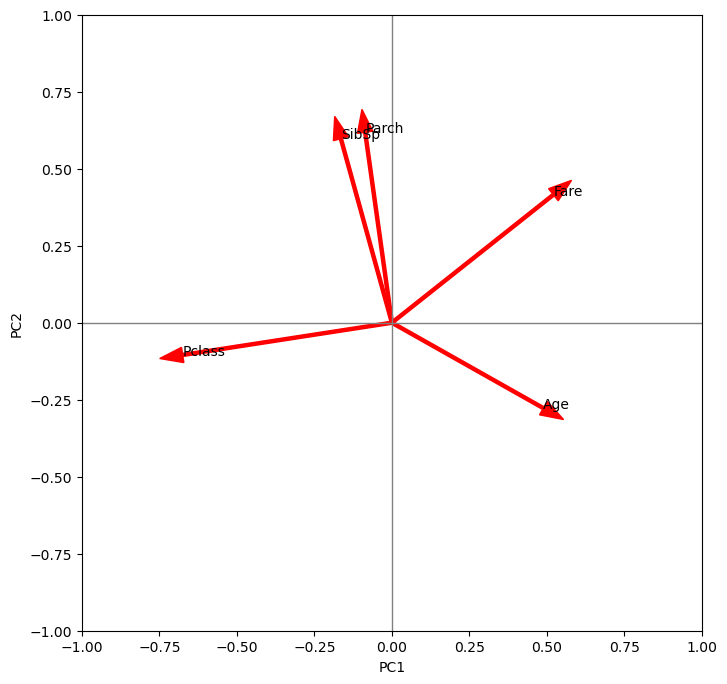

In [28]:
data = train
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Sélectionner les variables à inclure dans l'analyse
variables = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

# Extraire les données pour les variables sélectionnées
X = data[variables].values

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer un objet PCA avec 2 composantes principales
pca = PCA(n_components=2)

# Appliquer l'analyse en composantes principales aux données standardisées
principal_components = pca.fit_transform(X_scaled)

# Créer un DataFrame pour les composantes principales
components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ajouter les données de la variable cible (Survived) au DataFrame
components_df['Survived'] = data['Survived']

# Tracer le cercle de corrélation
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
for i, variable in enumerate(variables):
    ax.annotate(variable, (pca.components_[0, i], pca.components_[1, i]))
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', width=0.01, head_width=0.05)
plt.show()


# A modifier voir avec GREG pk ca n'a pas prit variables = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
1. La composante F1 est CO linéaire et expliquée en grande partie par Fat puis saturated fat. La corrélation est forte. Donc les features FAT et Saturated FAT peuvent être utilisées pour prédire F1.
1. La composante F2 est Co linéaire et expliquée en grande partie par carbohydrates puis sugars. La corrélation est forte. Donc les features carbohydrates et Sugars peuvent être utilisées pour prédire F2.
1. F1+F2 expliquent (63.4+18.5%) soit 81.9% de la variance du modele Donc la plupart de la variance dans les données peut être expliquée par ces deux facteurs ( F1+F2) combinés.
1. Les variables "f1" et "f2" expliquent ensemble 81,9% de la variance totale du modèle.

In [29]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split


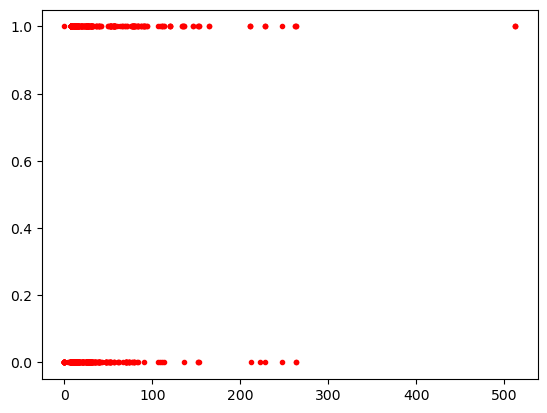

In [30]:
# On affiche le nuage de points dont on dispose
plt.plot(train['Fare'], train['Survived'], 'ro', markersize=3)
plt.show()

In [31]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0     3.0   
1            2         1     1.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S

In [32]:
def clean(data):
    # dropping the columns that are not significant for survival
    droppable_columns = ["Name", "Ticket", "Cabin"] 
    data = data.drop(droppable_columns, axis=1)
    
    # "Age" missing values replaced by the mean age
    data["Age"].fillna(data["Age"].mean(),inplace=True)
    # data['Age'] = data[['Age', "Pclass"]].apply(age_engineering, axis = 1)

    # "Embarked" missing values replaced by U(unknown)
    data["Embarked"].fillna("U", inplace=True)

    # "SibSp", "Parch" missing values replaced by 0
    data["SibSp"].fillna(0, inplace=True)
    data["Parch"].fillna(0, inplace=True)

    # "Fare" missing values replaced by its median
    data["Fare"].fillna(data["Fare"].mean(),inplace=True)
    
    return data

In [33]:
train_data = train
test_data = test

count    891.000000
mean      30.072994
std       13.535226
min        0.420000
25%       22.000000
50%       28.000000
75%       38.500000
max       80.000000
Name: Age, dtype: float64


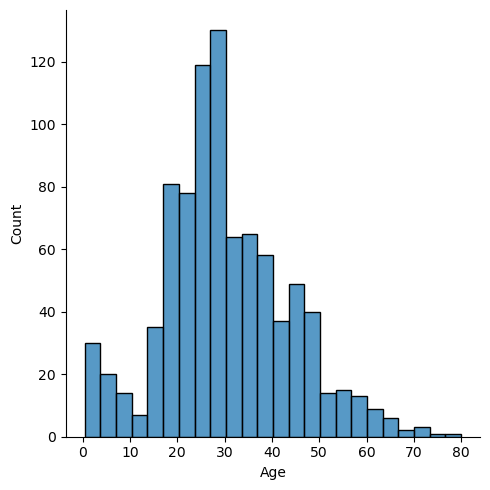

In [34]:
print(train_data["Age"].describe())
sns.displot(x='Age',data=train_data)

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


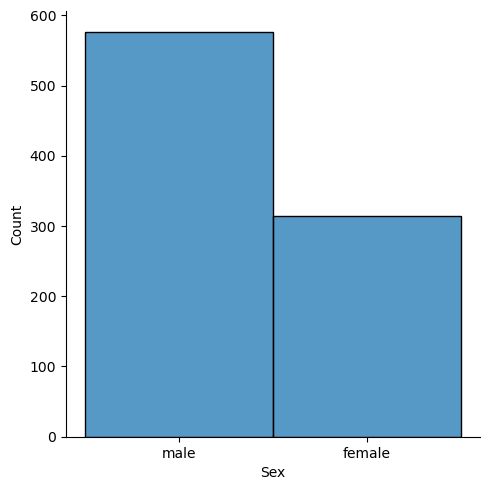

In [35]:
print(train_data["Sex"].describe())
sns.displot(x='Sex',data=train_data)

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


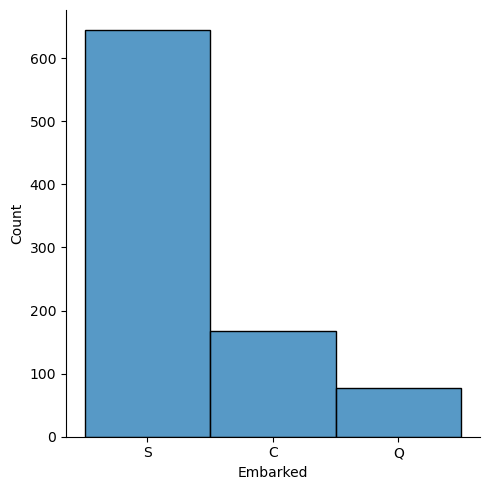

In [36]:
print(train_data["Embarked"].describe())
sns.displot(x='Embarked',data=train_data)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


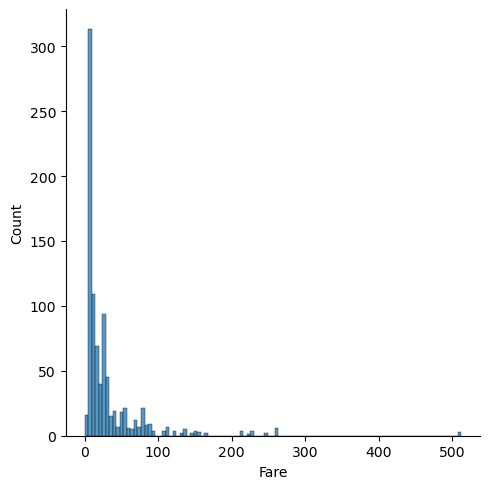

In [37]:
print(train_data["Fare"].describe())
sns.displot(x='Fare',data=train_data)

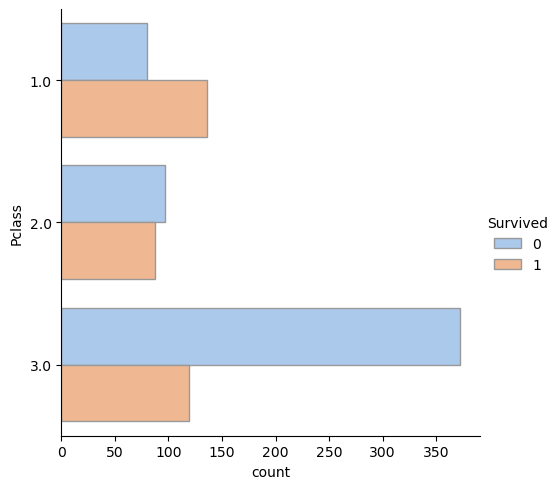

In [38]:
sns.catplot(data=train_data, y="Pclass", hue="Survived", kind="count", palette="pastel", edgecolor=".6")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

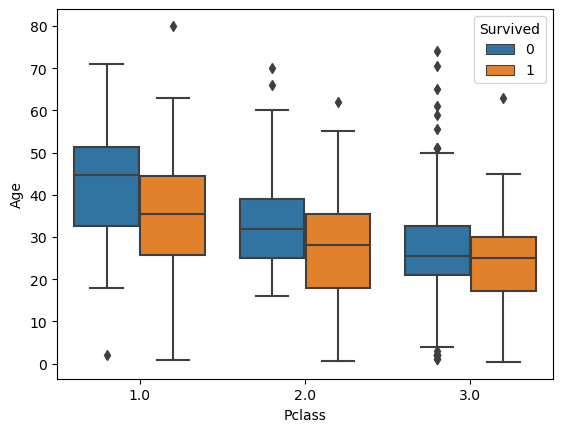

In [39]:
sns.boxplot(data=train_data, x="Pclass", y="Age", hue="Survived")


<AxesSubplot:xlabel='Age', ylabel='Sex'>

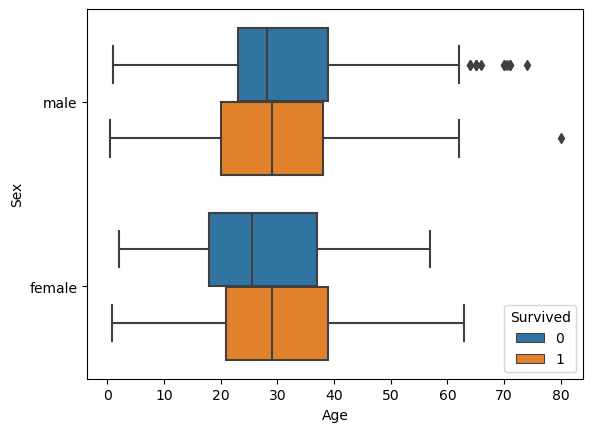

In [40]:
sns.boxplot(data=train_data, x="Age", y="Sex", hue="Survived")


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

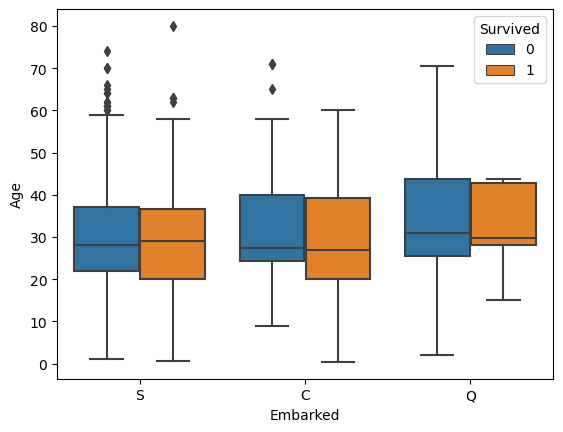

In [41]:
sns.boxplot(data=train_data, x="Embarked", y="Age", hue="Survived")


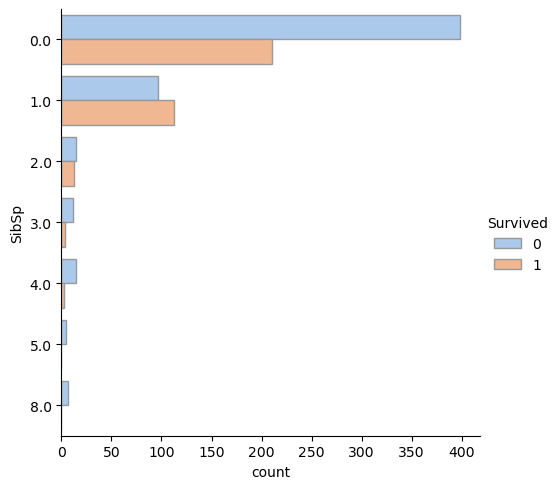

In [42]:
sns.catplot(data=train_data, y="SibSp", hue="Survived", kind="count", palette="pastel", edgecolor=".6")

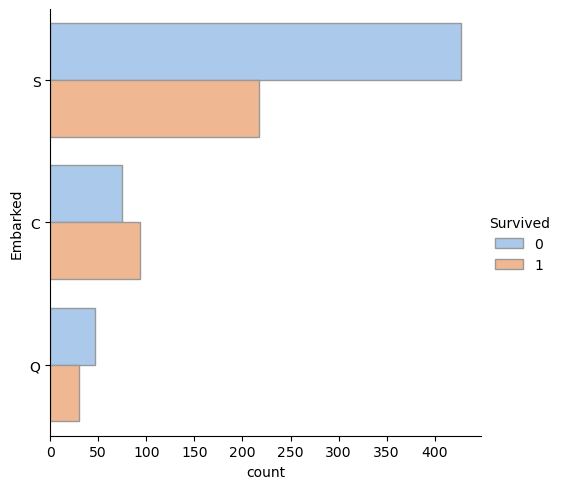

In [43]:
sns.catplot(data=train_data, y="Embarked", hue="Survived", kind="count", palette="pastel", edgecolor=".6")

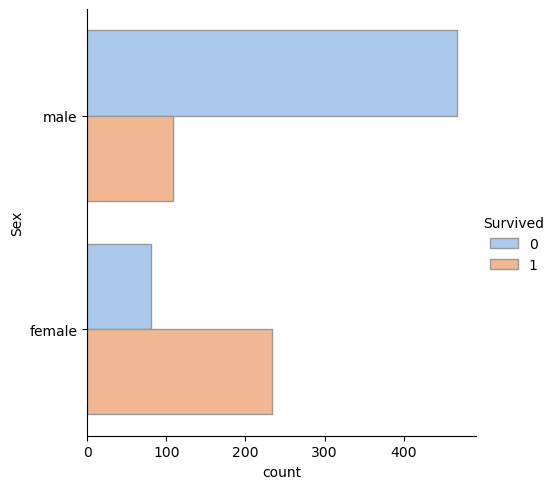

In [44]:
sns.catplot(data=train_data, y="Sex", hue="Survived", kind="count", palette="pastel", edgecolor=".6")

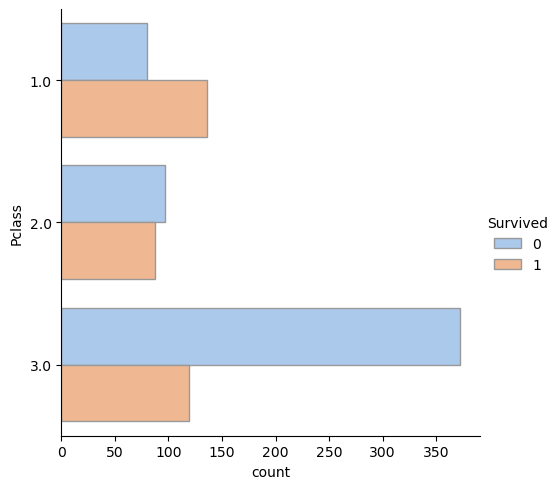

In [45]:
sns.catplot(data=train_data, y="Pclass", hue="Survived", kind="count", palette="pastel", edgecolor=".6")

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Logistic Revolution

Logistic Revolution

In [47]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0     3.0   
1            2         1     1.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S

In [48]:
#Nettoyage
train = clean(train)
#Logistic Revolution


# Convertir les variables catégorielles en données numériques en utilisant l'encodage one-hot
#permet de créer des variables indicatrices à partir d'une variable catégorielle en représentant chaque catégorie comme une variable binaire.
#Cela est utile dans la préparation de données pour les algorithmes de machine learning 

train = pd.get_dummies(train, columns=["Sex", "Embarked", "Pclass"])


# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1), train["Survived"], test_size=0.2,random_state=42)

# Construire un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les résultats sur les données de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8044692737430168


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [49]:
"""# Convertir les variables catégorielles en données numériques en utilisant l'encodage one-hot
# permet de créer des variables indicatrices à partir d'une variable catégorielle en représentant chaque catégorie comme une variable binaire.
# Cela est utile dans la préparation de données pour les algorithmes de machine learning 

# Afficher les noms de colonnes actuels dans les données
print(train.columns)

# Renommer les colonnes pour qu'elles correspondent aux noms fournis à la méthode pd.get_dummies()
train = train.rename(columns={"Sexe": "Sex", "Embarquement": "Embarked", "Classe": "Pclass"})

# Encoder les variables catégorielles en variables numériques
train = pd.get_dummies(train, columns=["Sex", "Embarked", "Pclass"])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1), train["Survived"], test_size=0.2, random_state=42)

# Construire un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les résultats sur les données de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
"""

'# Convertir les variables catégorielles en données numériques en utilisant l\'encodage one-hot\n# permet de créer des variables indicatrices à partir d\'une variable catégorielle en représentant chaque catégorie comme une variable binaire.\n# Cela est utile dans la préparation de données pour les algorithmes de machine learning \n\n# Afficher les noms de colonnes actuels dans les données\nprint(train.columns)\n\n# Renommer les colonnes pour qu\'elles correspondent aux noms fournis à la méthode pd.get_dummies()\ntrain = train.rename(columns={"Sexe": "Sex", "Embarquement": "Embarked", "Classe": "Pclass"})\n\n# Encoder les variables catégorielles en variables numériques\ntrain = pd.get_dummies(train, columns=["Sex", "Embarked", "Pclass"])\n\n# Séparer les données en ensembles d\'entraînement et de test\nX_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1), train["Survived"], test_size=0.2, random_state=42)\n\n# Construire un modèle de régression logistique\n

**